### Logistic Regression

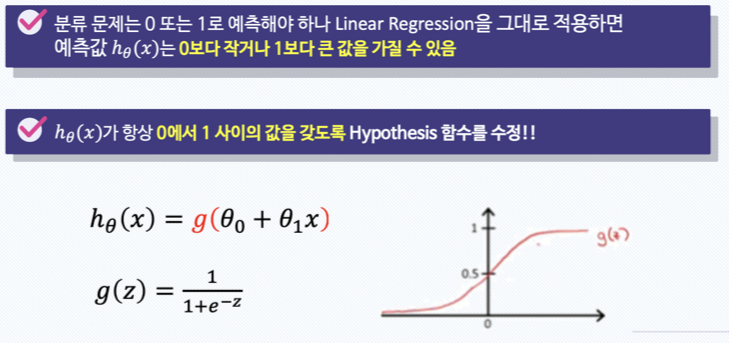

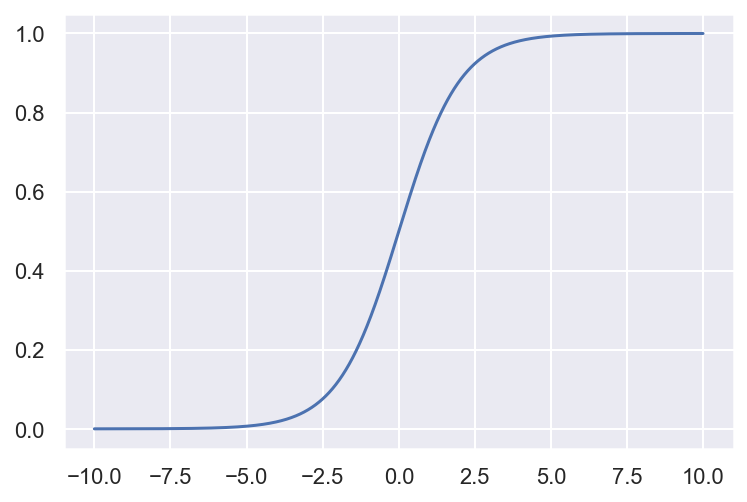

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-10, 10, 0.01)
g = 1 / (1+np.exp(-z))
plt.plot(z, g);

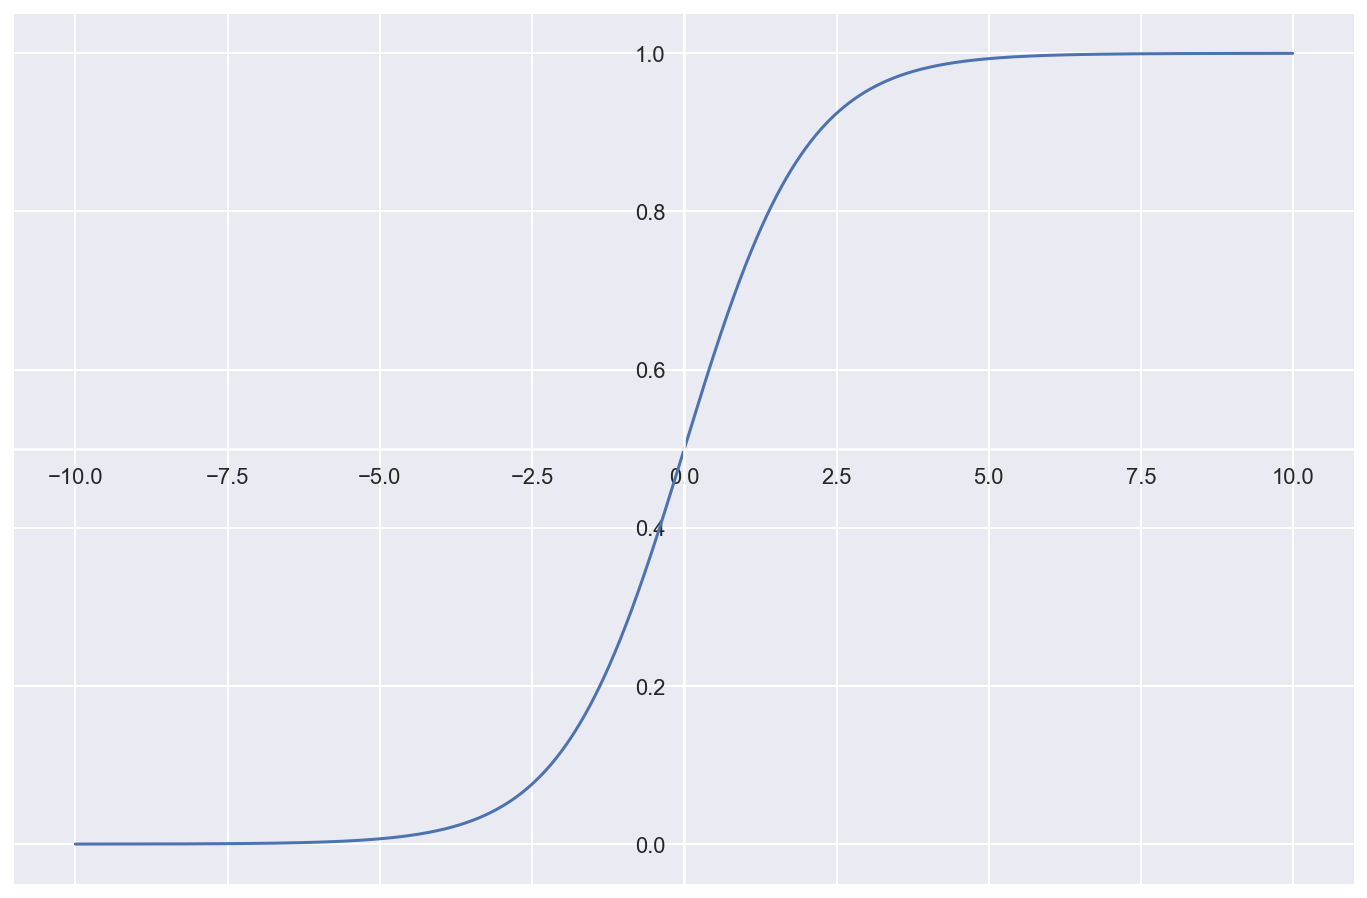

In [10]:
# 디테일하게 그려보기
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(z, g)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.show()

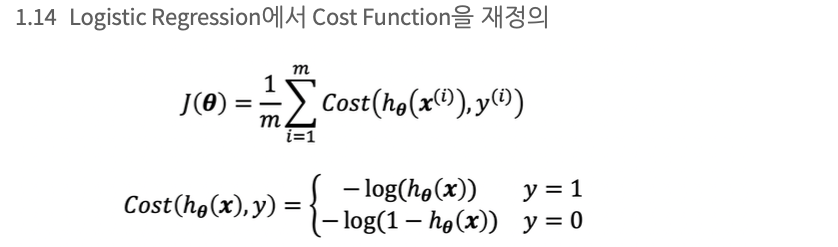

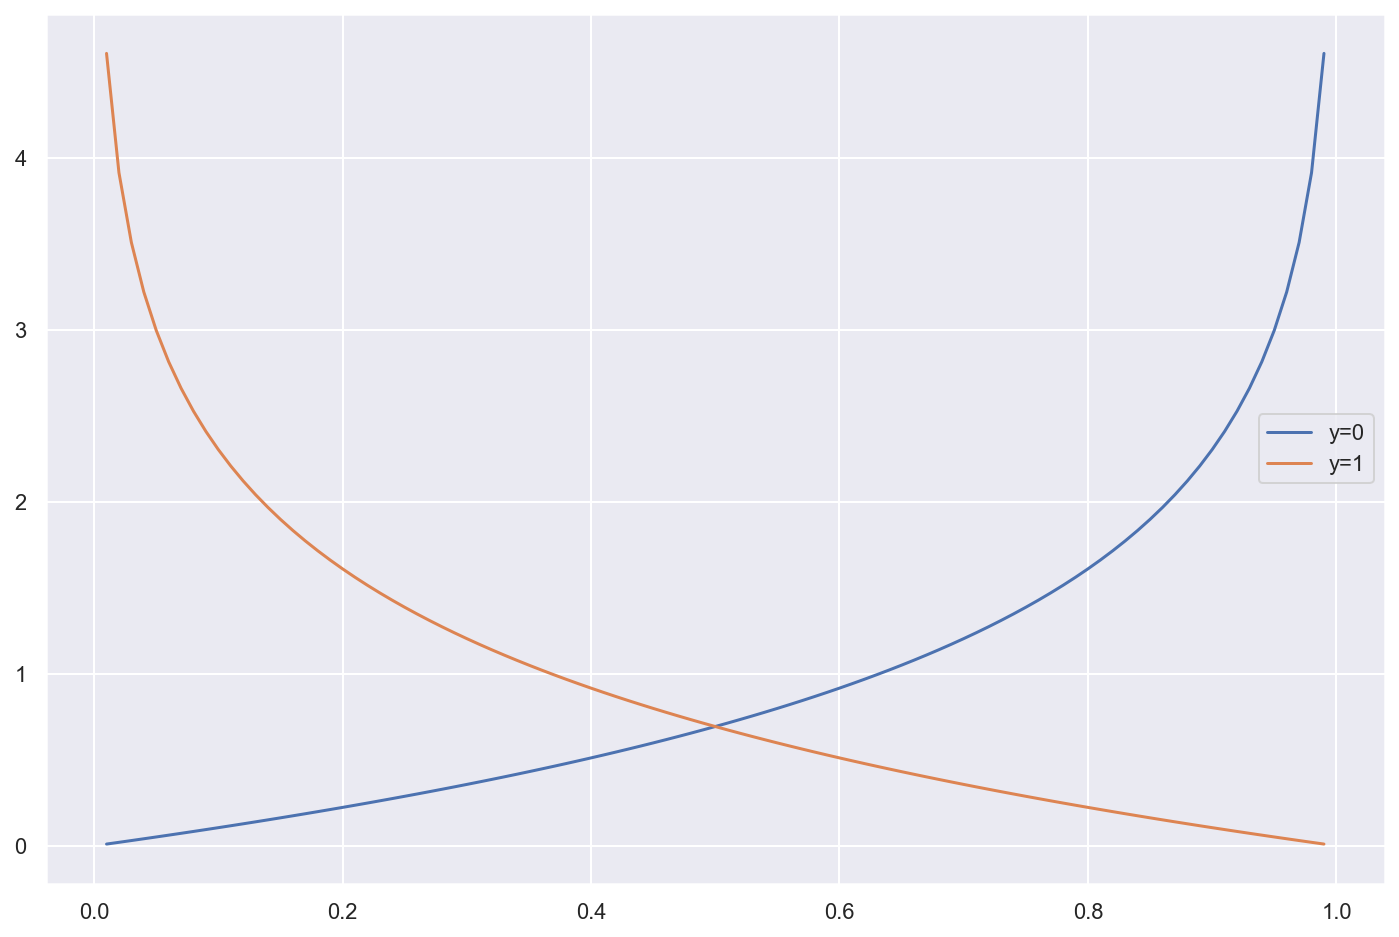

In [13]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, C0, label='y=0')
plt.plot(h, C1, label='y=1')
plt.legend()

plt.show()

### 와인 데이터로 실습하기

In [14]:
import pandas as pd

red_wine = pd.read_csv("./data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("./data/winequality-white.csv", sep=";")

red_wine["color"] = 1.
white_wine["color"] = 0.

wine = pd.concat([red_wine, white_wine])
wine["taste"] = [1. if grade>5 else 0. for grade in wine["quality"]]

X = wine.drop(["taste", "quality"], axis=1)
y = wine["taste"]

In [15]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [17]:
# 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7425437752549547
Test Acc :  0.7438461538461538


In [24]:
# 스케일러 적용하여 파이프라인 구축
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
            ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))
# 미세한 상승

Train Acc :  0.7444679622859341
Test Acc :  0.7469230769230769


### Decision Tree와의 비교

In [26]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

models = {'logistic regression':pipe, 'decision tree':wine_tree}

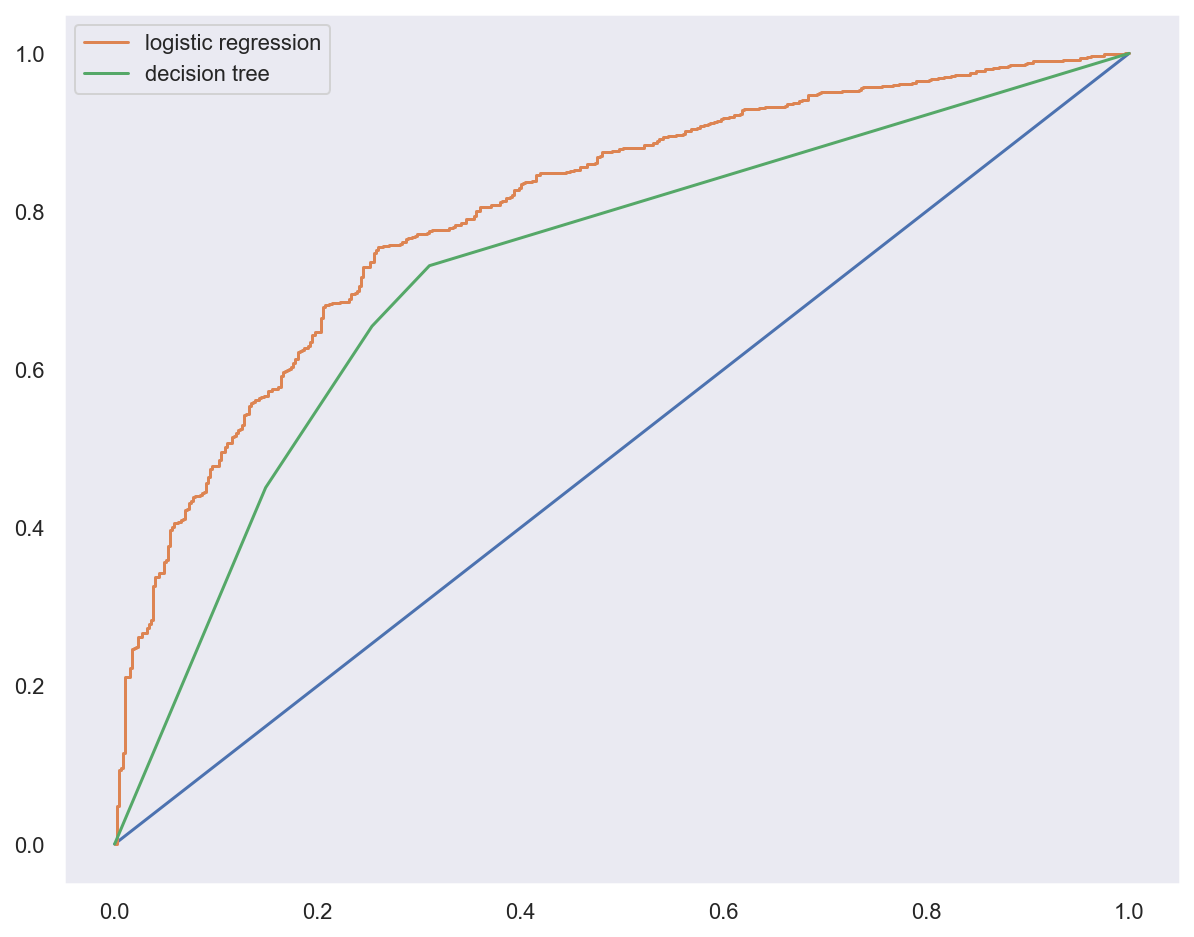

In [27]:
# AUC 그래프를 이용한 모델간 비교
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

### PIMA 인디언 당뇨병 예측

In [28]:
PIMA = pd.read_csv('./data/diabetes.csv')
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


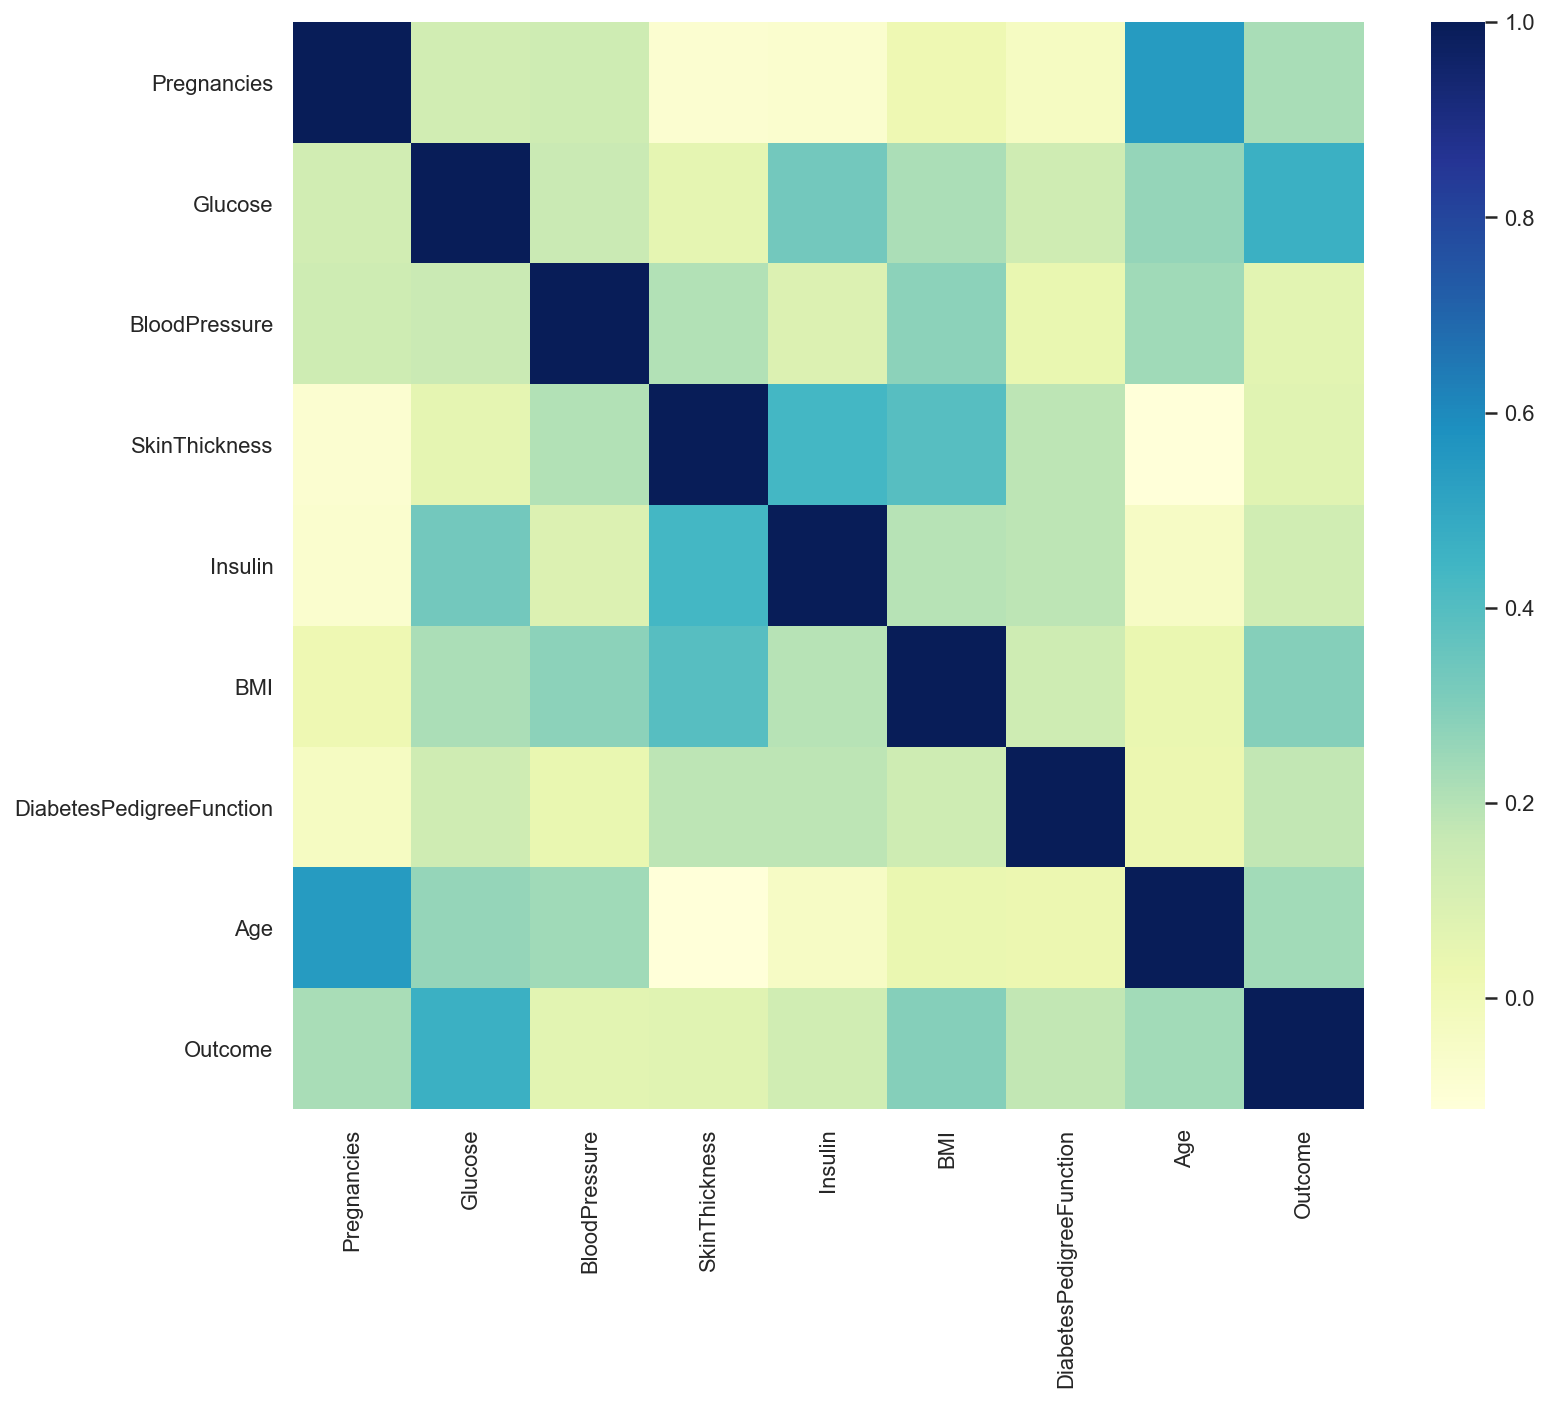

In [33]:
# 상관관계 확인

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
corr_matrix = PIMA.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu') # annot=True
plt.show()

In [36]:
# 결측치 확인
(PIMA==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [40]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [42]:
# 트레인/테스트 데이터 분류
from sklearn.model_selection import train_test_split

X = PIMA.drop('Outcome', axis=1)
y = PIMA['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=13, 
                                                   stratify= y)

In [43]:
# 학습 및 예측
estimators = [('scaler', StandardScaler()),
            ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [44]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                            roc_auc_score, f1_score)
print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC Score : ', roc_auc_score(y_test, pred))
print('f1 score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
AUC Score :  0.7355555555555556
f1 score :  0.6534653465346535


In [51]:
# 다변수 방정식의 각 계수값 확인
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)
coeff

[0.354265888441265,
 1.2014244425037581,
 -0.15840135536286712,
 0.03394657712929959,
 -0.16286471953988135,
 0.6204045219895111,
 0.36669355795578745,
 0.17195965447035086]

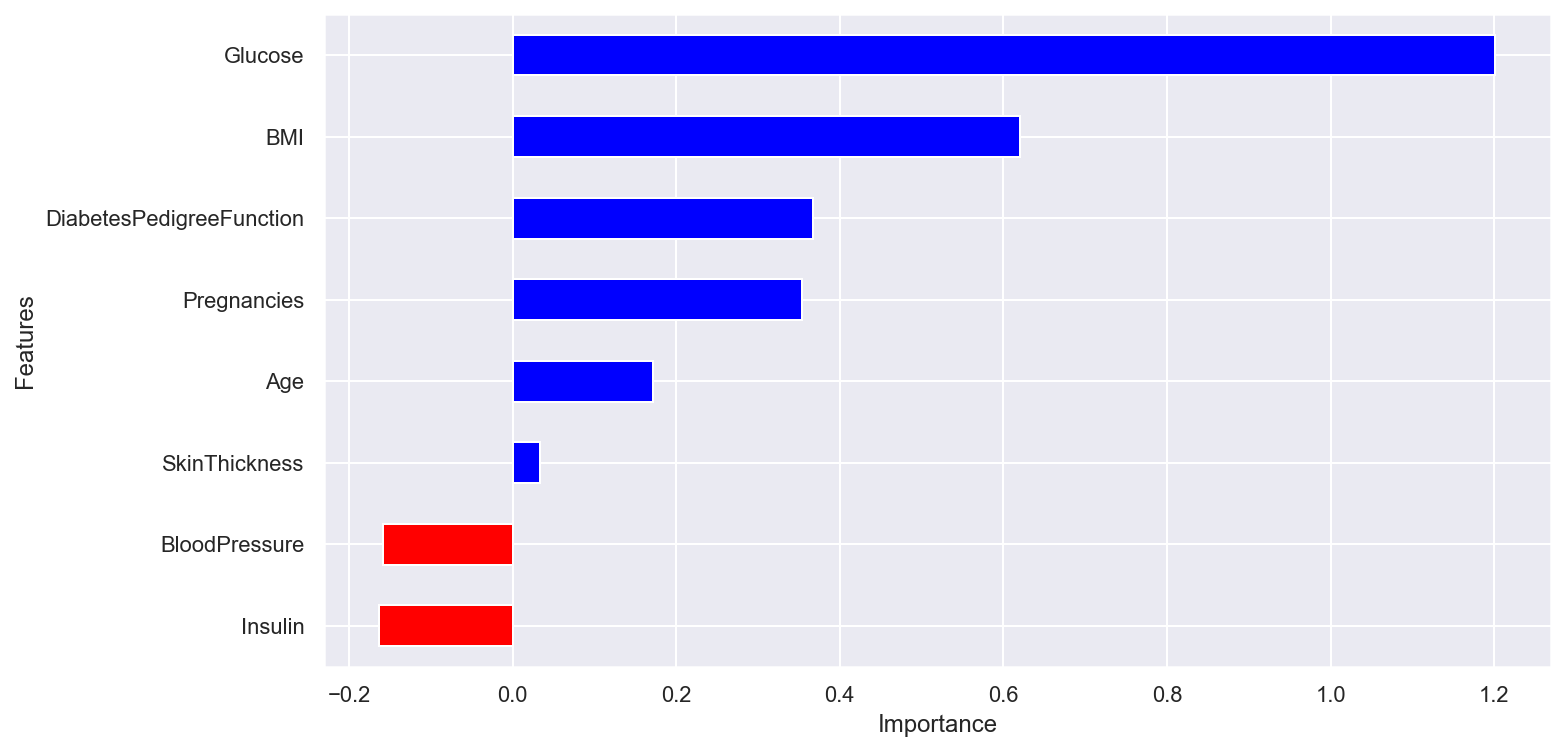

In [52]:
# 중요 feature 그리기
features = pd.DataFrame({'Features': labels, 'importance':coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh', figsize=(11, 6),
                           color=features['positive'].map({True:'blue',
                                                          False:'red'}))
plt.xlabel('Importance')
plt.show()